# Census Income Project

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
url=('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df=pd.read_csv(url)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Let's look at the shape
df.shape

(32560, 15)

In [5]:
# Let's have a look at the datatypes
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

<AxesSubplot:>

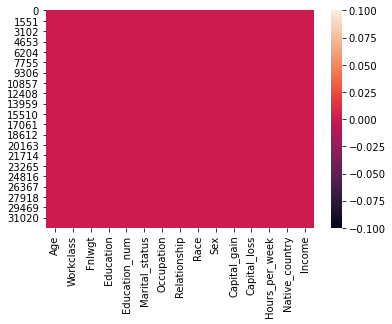

In [6]:
# Let's check for null values
sns.heatmap(df.isnull())

# No Null Values found

# EDA (Data Exploration/Analysis)

In [7]:
# checking the missing values in the dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no missing value

In [8]:
# Statistical Summary of the numerical columns
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


From the statistical Summary, we can see that column "Capital_gain" and "Capital_loss" has missing values.

In [9]:
# We saw that there are some rows in the columns - (workclass,occupation,native_country) with '?' symbol. Let's see how many are there

dx=df[(df['Workclass']=="?") | (df['Occupation']=="?") | (df['Native_country']==" ?")]
dx.shape

(583, 15)

In [10]:
df.drop(df[(df['Workclass']==" ?") | (df['Occupation']==" ?") | (df['Native_country']==" ?")].index,inplace=True)
df.shape

(30161, 15)

In [11]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
# We saw that there are some rows in the columns - (workclass,occupation,native_country) with '?' symbol. Let's see how many are there

dx=df[(df['Workclass']=="?") | (df['Occupation']=="?") | (df['Native_country']==" ?")]
dx.shape

(0, 15)

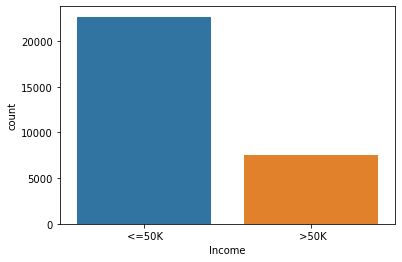

In [13]:
#Plot each class frequency
sns.countplot(x='Income',data=df)
plt.show()

In [14]:
# Let's understand and clean feature Workclass 
df['Workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1278
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: Workclass, dtype: int64

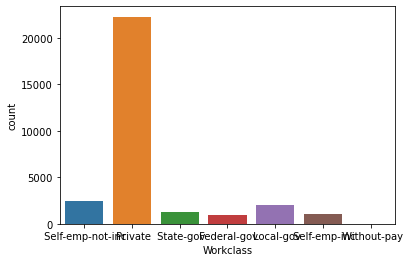

In [15]:
#Plot each class frequency
sns.countplot(x='Workclass',data=df)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' 7th-8th'),
  Text(8, 0, ' Doctorate'),
  Text(9, 0, ' Assoc-voc'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' Preschool'),
  Text(14, 0, ' 12th'),
  Text(15, 0, ' 1st-4th')])

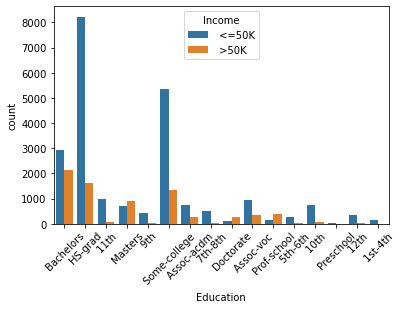

In [16]:
# Let's see for education
sns.countplot(df['Education'],hue=df['Income'])
plt.xticks(rotation=45)

In [17]:
# Let's see for Marital Status
df['Marital_status'].value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: Marital_status, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

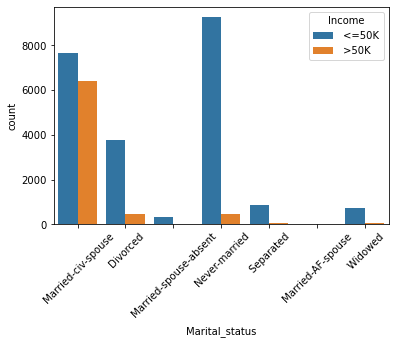

In [18]:
# Let's see for Marital Status
sns.countplot(df['Marital_status'],hue=df['Income'])
plt.xticks(rotation=45)

In [19]:
# Let's look at Occupation distribution
df['Occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3720
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: Occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Transport-moving'),
  Text(7, 0, ' Farming-fishing'),
  Text(8, 0, ' Machine-op-inspct'),
  Text(9, 0, ' Tech-support'),
  Text(10, 0, ' Craft-repair'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

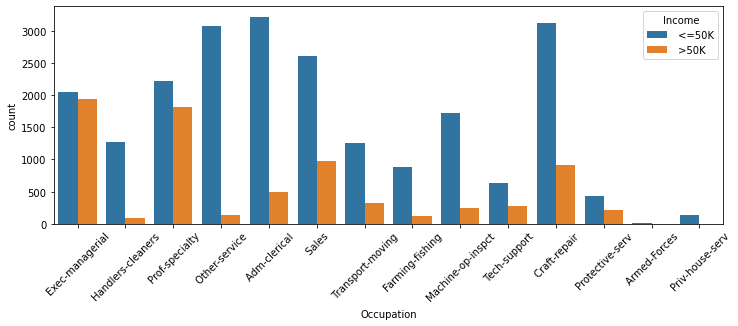

In [20]:
# Let's visulaize the graph for occupation
plt.figure(figsize=(12,4))
sns.countplot(df['Occupation'],hue=df['Income'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

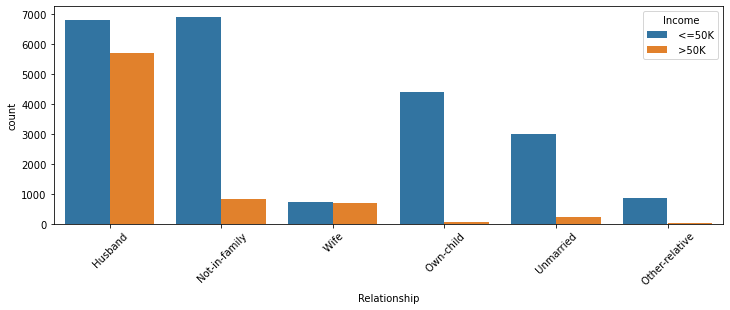

In [21]:
# Let's visulaize the graph for relationship
plt.figure(figsize=(12,4))
sns.countplot(df['Relationship'],hue=df['Income'])
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Sex', ylabel='count'>

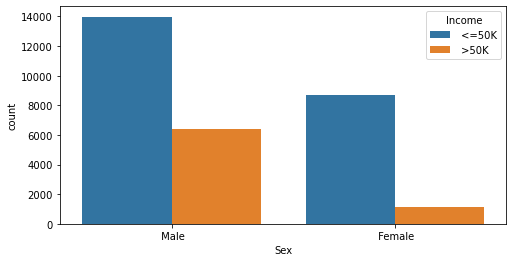

In [22]:
# Let's visulaize the graph for sex
plt.figure(figsize=(8,4))
sns.countplot(df['Sex'],hue=df['Income'])

In [23]:
# Let's see for native-country
df['Native_country'].value_counts()

 United-States                 27503
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Haiti                            42
 Taiwan                           42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

North_America          27719
Latin_South_America     1315
Asia                     634
Europe                   493
Name: Native_country, dtype: int64

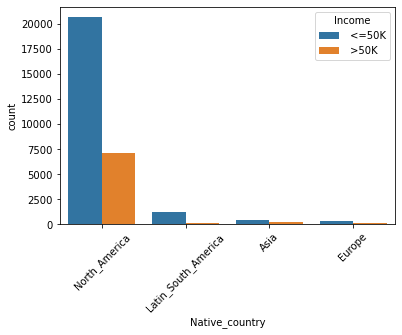

In [24]:
# Let's merge categories as continents
# Creating Lists
Asia = [' China',' Hong',' India',' Iran',' Cambodia',' Japan', ' Laos',
          ' Philippines' ,' Vietnam' ,' Taiwan', ' Thailand']
North_America = [' Canada',' United-States',' Puerto-Rico' ]

Europe = [' England' ,' France', ' Germany' ,' Greece',' Holand-Netherlands',' Hungary',
            ' Ireland',' Italy',' Poland',' Portugal',' Scotland',' Yugoslavia']

Latin_South_America = [' Columbia',' Cuba',' Dominican-Republic',' Ecuador',
                             ' El-Salvador',' Guatemala',' Haiti',' Honduras',
                             ' Mexico',' Nicaragua',' Outlying-US(Guam-USVI-etc)',' Peru',
                            ' Jamaica',' Trinadad&Tobago',' South']

def Continents(y):
    if(y in Asia):
        return('Asia')
    elif (y in North_America):
        return('North_America')
    elif (y in  Europe):
        return('Europe')
    else:
        return('Latin_South_America')
          
df['Native_country'] = df['Native_country'].apply(Continents)
    
sns.countplot(df['Native_country'],hue=df['Income'])
plt.xticks(rotation=45)

# We observe that in all the continents distribution is with <50k is more than >50k
df['Native_country'].value_counts()

In [25]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,1.897976e+05,10.121216,1091.971984,88.375419,40.931269
std,13.134882,1.056527e+05,2.549983,7406.466659,404.304753,11.980182
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176280e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784290e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376300e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [26]:
#Let's store all the continuous data in a list
continous=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

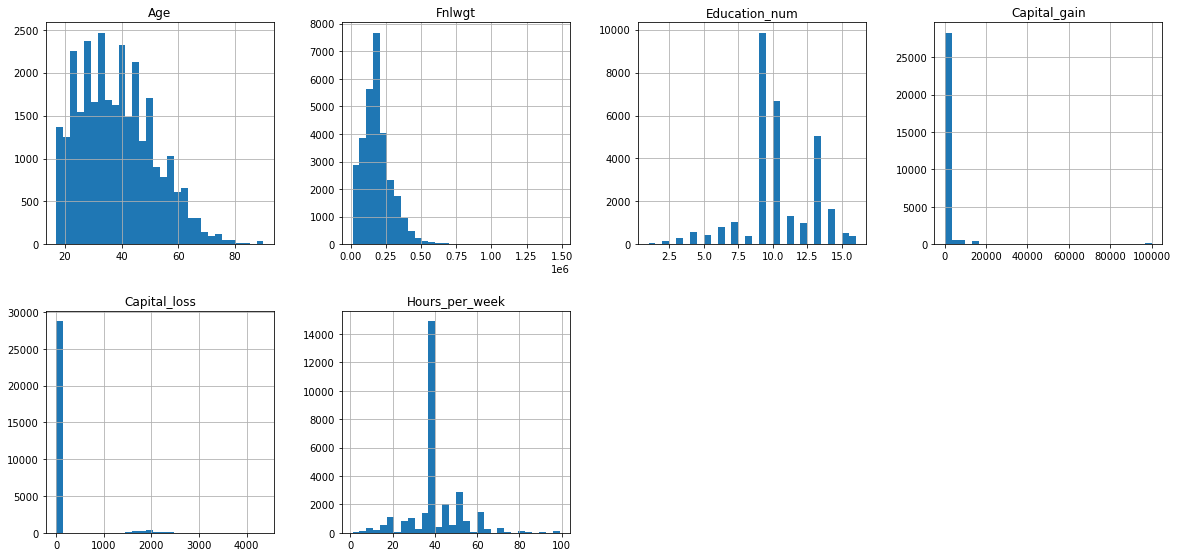

In [27]:
#Let's see the distributions
df[continous].hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [28]:
#Let's check skewness
df.skew()

Age                0.530223
Fnlwgt             1.459212
Education_num     -0.305328
Capital_gain      11.902511
Capital_loss       4.526294
Hours_per_week     0.330856
dtype: float64

In [29]:
# Treating for skewness
for col in df.columns:
    if df[col].dtypes!="object":
        if df.skew().loc[col]>0.55:
            df[col]=np.log1p(df[col])
        if df.skew().loc[col]<-0.55:
            df[col]=np.square(df[col])
df.skew()

Age               0.530223
Fnlwgt           -0.667533
Education_num    -0.305328
Capital_gain      3.073907
Capital_loss      4.272304
Hours_per_week    0.330856
dtype: float64

<AxesSubplot:>

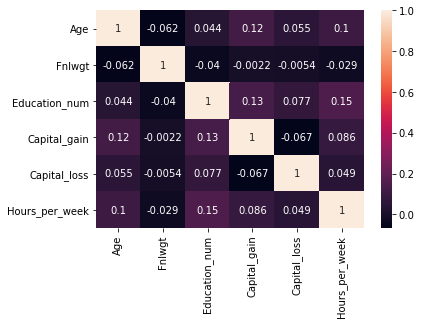

In [30]:
# Let's see correlation within continous variables
sns.heatmap(df.corr(),annot=True)

In [31]:
# Let's do Label Encoding on the Categorical Values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtypes=="object":
        df[col]=le.fit_transform(df[col])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,128.376783,9,13,2,3,0,4,1,0.0,0.0,13,3,0
1,38,2,150.832739,11,9,0,5,1,4,1,0.0,0.0,40,3,0
2,53,2,152.921842,1,7,2,5,0,2,1,0.0,0.0,40,3,0
3,28,2,162.104167,9,13,2,9,5,2,0,0.0,0.0,40,2,0
4,37,2,157.722961,12,14,2,3,5,4,0,0.0,0.0,40,3,0


<AxesSubplot:>

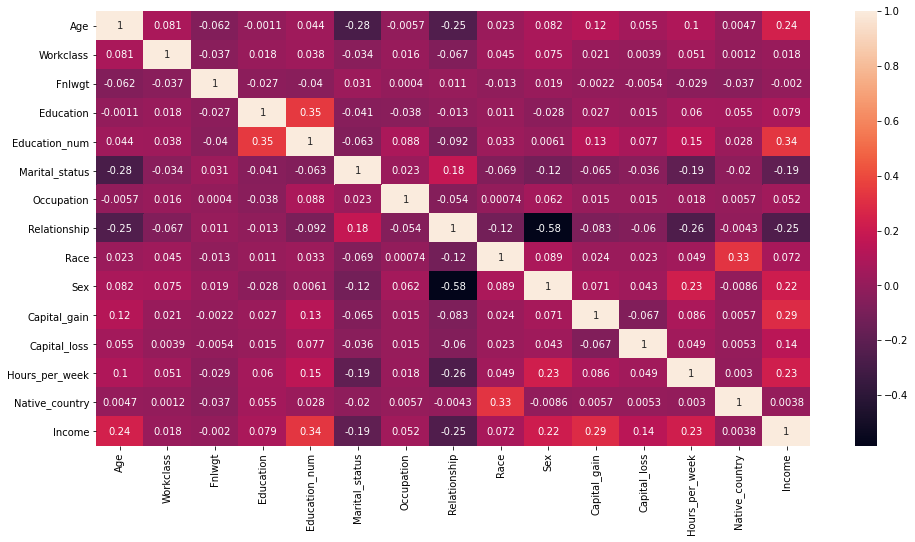

In [32]:
# Let's see correlation between all variables
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

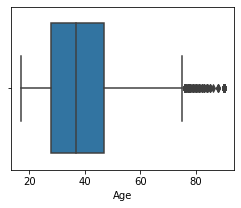

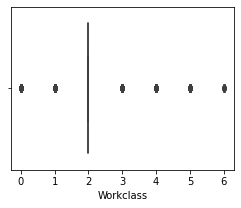

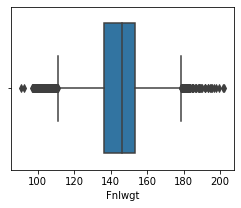

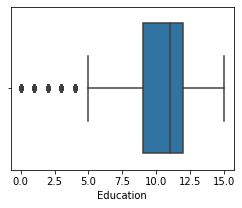

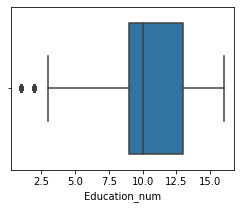

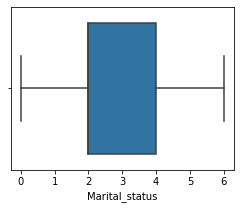

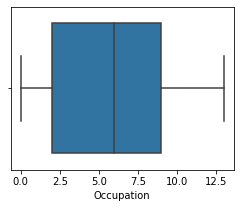

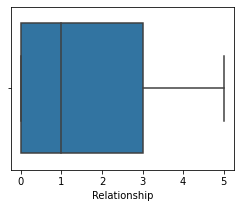

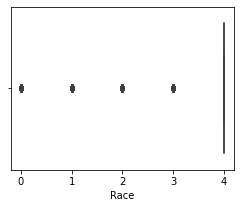

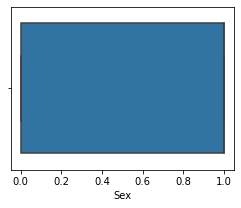

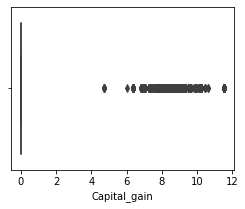

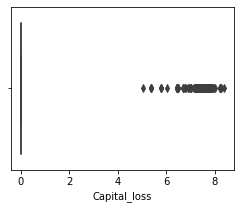

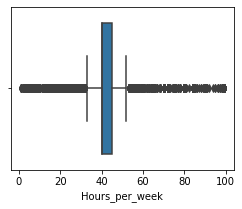

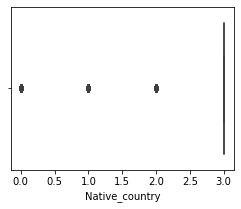

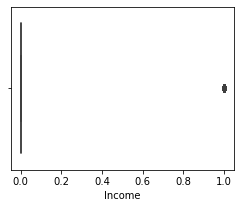

In [33]:
for col in df:
    
    plt.figure(figsize=(4,3))
    sns.boxplot(df[col])

In [34]:
from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df=df[(z<3).all(axis=1)]
print(df.shape)

(30161, 15)
(24647, 15)


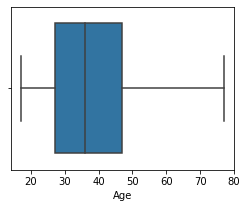

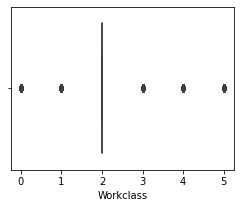

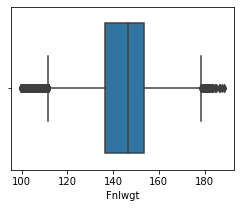

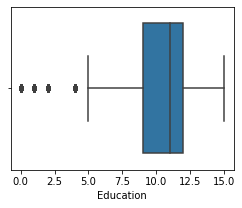

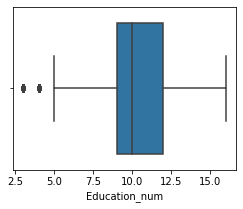

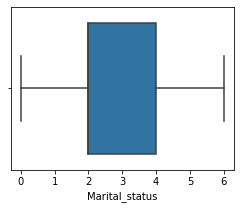

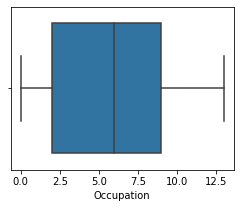

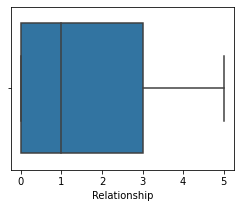

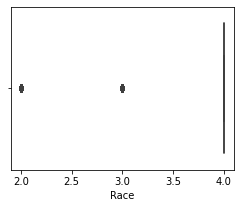

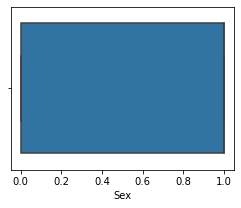

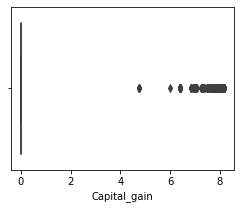

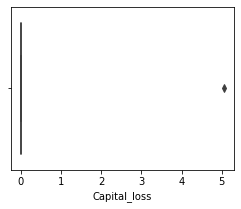

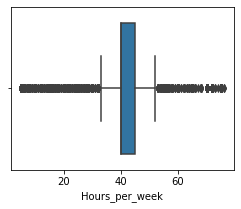

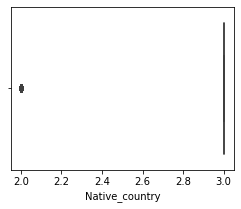

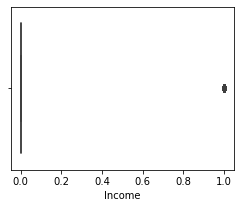

In [35]:
for col in df:
    
    plt.figure(figsize=(4,3))
    sns.boxplot(df[col])

In [36]:
# Let's Separate our dataset into Features and target
x=df.drop(columns=["Income"])
y=df[["Income"]]

In [37]:
# Let's do Standard Scaling on the Continous variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x[continous]=sc.fit_transform(x[continous])
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.962097,4,-1.092065,9,1.256270,2,3,0,4,1,-0.155279,-0.00637,-2.511736,3
1,0.031718,2,0.445106,11,-0.415501,0,5,1,4,1,-0.155279,-0.00637,-0.011100,3
2,1.194691,2,0.588111,1,-1.251386,2,5,0,2,1,-0.155279,-0.00637,-0.011100,3
3,-0.743598,2,1.216666,9,1.256270,2,9,5,2,0,-0.155279,-0.00637,-0.011100,2
4,-0.045814,2,0.916760,12,1.674213,2,3,5,4,0,-0.155279,-0.00637,-0.011100,3


# Model Building

In [38]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
# For Classification let's focus on auc-roc score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_resample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [39]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="roc_auc")
    print("Mean ROC_AUC score for classifier: ",c_scores.mean())
    print("standard deviation in ROC_AUC score for classifier: ",c_scores.std())
    print(c_scores)

In [40]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [41]:
rfc=RandomForestClassifier(n_estimators=500)
r_state=max_aucroc_score(rfc,x,y)

max auc roc score corresponding to  95  is  0.7802676484558583


In [42]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knn, parameters, cv=5,scoring="roc_auc")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 19}

In [43]:
knn=KNeighborsClassifier(n_neighbors=19)
r_state=max_aucroc_score(knn,x,y)

max auc roc score corresponding to  83  is  0.8037096440072568


In [44]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
parameters = {"criterion":["gini", "entropy"]}
clf = GridSearchCV(dc, parameters, cv=5,scoring="roc_auc")
clf.fit(x, y)
clf.best_params_

{'criterion': 'gini'}

In [45]:
dc=DecisionTreeClassifier(criterion="entropy")
r_state=max_aucroc_score(dc,x,y)

max auc roc score corresponding to  73  is  0.7222872633149405


In [46]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
r_state=max_aucroc_score(lg,x,y)

max auc roc score corresponding to  46  is  0.7564055885817833


In [47]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
r_state=max_aucroc_score(ad,x,y)

max auc roc score corresponding to  59  is  0.8173007911647343


### Cross Validation

In [50]:
print("\n\nRandom Forest Classifier\n\n")
model_evaluation(rfc,x,y)

print("\n\nKNN Classifier\n\n")
model_evaluation(knn,x,y)

print("\n\nDecisionTree Classifier\n\n")
model_evaluation(dc,x,y)

print("\n\nLogistic Regression Classifier\n\n")
model_evaluation(lg,x,y)


print("\n\nAdaboost Classifier\n\n")
model_evaluation(ad,x,y)



Random Forest Classifier


Mean ROC_AUC score for classifier:  0.8779183093001517
standard deviation in ROC_AUC score for classifier:  0.0035686114901118354
[0.87567979 0.87264832 0.88274293 0.88067669 0.87784381]


KNN Classifier


Mean ROC_AUC score for classifier:  0.8724813696894381
standard deviation in ROC_AUC score for classifier:  0.0034744196601512556
[0.86939962 0.87019816 0.87005499 0.87854591 0.87420816]


DecisionTree Classifier


Mean ROC_AUC score for classifier:  0.6872212808041058
standard deviation in ROC_AUC score for classifier:  0.0016916765606133644
[0.68744311 0.68550888 0.68958264 0.68842482 0.68514696]


Logistic Regression Classifier


Mean ROC_AUC score for classifier:  0.8246542258130045
standard deviation in ROC_AUC score for classifier:  0.008850042723706542
[0.80846349 0.82561472 0.82409096 0.83387742 0.83122455]


Adaboost Classifier


Mean ROC_AUC score for classifier:  0.8951299013916998
standard deviation in ROC_AUC score for classifier:  0.00383532

In [53]:
from imblearn.over_sampling import SMOTE

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 43,test_size=0.20)


sm=SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)
ad.fit(x_train,y_train)
y_pred = ad.predict(x_test)

Confusion matrix 
 [[3187  761]
 [ 211  771]]
classification report 
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      3948
           1       0.50      0.79      0.61       982

    accuracy                           0.80      4930
   macro avg       0.72      0.80      0.74      4930
weighted avg       0.85      0.80      0.82      4930

AUC_Score: 0.796188278578754
[0 0 0 ... 0 0 0]


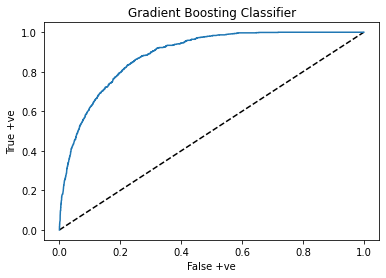

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print('AUC_Score:',roc_auc_score(y_test,y_pred))
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('Gradient Boosting Classifier')
plt.show
print(y_pred)

In [59]:
#Saving the model to the local file system:
import pickle

In [60]:
filename='census.pickle'
pickle.dump(ad,open(filename,'wb'))